# Prep for Modelling

In [1]:
import time 
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, shutil

np.random.seed(123)

Using TensorFlow backend.


In [2]:
dog_breeds = ['Akitas','Australian Shepherds','Basset Hounds','Beagles','Belgian Malinois','Bernese Mountain',
              'Bichons Frises','Bloodhounds','Border Collies','Boston Terriers','Boxers','Brittanys','Bulldogs',
              'Cane Corso','Cavalier King Charles Spaniels','Chesapeake Bay Retrievers','Chihuahuas',
              'Cocker Spaniels','Dachshunds','Dalmatians','Doberman Pinschers','English Cocker Spaniels',
              'English Springer Spaniels','French Bulldogs','German Shepherd','German Shorthaired Pointers',
              'Golden Retrievers','Great Danes','Havanese','Labrador Retrievers','Maltese','Mastiffs',
              'Miniature American Shepherds','Miniature Schnauzers','Newfoundlands','Pembroke Welsh Corgis',
              'Pomeranians','Poodles','Portuguese Water Dogs','Pugs','Rhodesian Ridgebacks','Rottweilers',
              'Shetland Sheepdogs','Shiba Inu','Shih Tzu','Siberian Huskies','Vizslas','Weimaraners',
              'West Highland White Terriers','Yorkshire Terriers']

In [3]:
#Set batch size equal to the number of files in each folder

test_folder = './split_data/test'
train_folder = './split_data/train'
validate_folder = './split_data/validate'

count = 0

for breed in dog_breeds:
    
    for file in os.listdir('./split_data/train/'+breed):
        count += 1

train_batch_size = count


count = 0

for breed in dog_breeds:
    
    for file in os.listdir('./split_data/test/'+breed):
        count += 1

test_batch_size = count


count = 0

for breed in dog_breeds:
    
    for file in os.listdir('./split_data/validate/'+breed):
        count += 1

validate_batch_size = count

In [4]:
#resizing images

#test
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = test_batch_size) 

#validate
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validate_folder, 
        target_size=(64, 64), batch_size = validate_batch_size)

#train
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=train_batch_size)

Found 3550 images belonging to 50 classes.
Found 6000 images belonging to 50 classes.
Found 14350 images belonging to 50 classes.


In [5]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
validate_images, validate_labels = next(val_generator)

In [6]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = validate_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(validate_images.shape))
print ("val_labels shape: " + str(validate_labels.shape))

Number of training samples: 14350
Number of testing samples: 3550
Number of validation samples: 6000
train_images shape: (14350, 64, 64, 3)
train_labels shape: (14350, 50)
test_images shape: (3550, 64, 64, 3)
test_labels shape: (3550, 50)
val_images shape: (6000, 64, 64, 3)
val_labels shape: (6000, 50)


In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = validate_images.reshape(validate_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(14350, 12288)
(3550, 12288)
(6000, 12288)


In [8]:
train_y = np.reshape(train_labels[:,0], (14350,1))
test_y = np.reshape(test_labels[:,0], (3550,1))
val_y = np.reshape(validate_labels[:,0], (6000,1))

In [9]:
#export the datasets for later use

import pickle

pickle.dump(train_y, open("train_y.pkl", "wb"))
pickle.dump(test_y, open("test_y.pkl", "wb"))
pickle.dump(val_y, open("val_y.pkl", "wb"))

pickle.dump(train_img, open("train_img.pkl", "wb"))
pickle.dump(test_img, open("test_img.pkl", "wb"))
pickle.dump(val_img, open("val_img.pkl", "wb"))

pickle.dump(train_images, open("train_images.pkl", "wb"))
pickle.dump(test_images, open("test_images.pkl", "wb"))
pickle.dump(validate_images, open("validate_images.pkl", "wb"))

pickle.dump(train_labels, open("train_labels.pkl", "wb"))
pickle.dump(test_labels, open("test_labels.pkl", "wb"))
pickle.dump(validate_labels, open("val_labels.pkl", "wb"))

# Baseline Model

In [10]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

In [11]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, validate_labels))

Train on 14350 samples, validate on 6000 samples
Epoch 1/50
14350/14350 [==============================] - 7s 471us/step - loss: 8.5579 - acc: 0.0202 - val_loss: 8.2558 - val_acc: 0.0202
Epoch 2/50
14350/14350 [==============================] - 7s 463us/step - loss: 8.2557 - acc: 0.0178 - val_loss: 8.2535 - val_acc: 0.0215
Epoch 3/50
14350/14350 [==============================] - 7s 464us/step - loss: 8.2541 - acc: 0.0222 - val_loss: 8.2522 - val_acc: 0.0258
Epoch 4/50
14350/14350 [==============================] - 7s 466us/step - loss: 8.2527 - acc: 0.0225 - val_loss: 8.2507 - val_acc: 0.0202
Epoch 5/50
14350/14350 [==============================] - 7s 466us/step - loss: 8.2397 - acc: 0.0229 - val_loss: 8.0188 - val_acc: 0.0202
Epoch 6/50
14350/14350 [==============================] - 7s 467us/step - loss: 8.0126 - acc: 0.0255 - val_loss: 8.0063 - val_acc: 0.0270
Epoch 7/50
14350/14350 [==============================] - 7s 473us/step - loss: 7.8930 - acc: 0.0297 - val_loss: 7.7655 - v

In [12]:
model.save('model.baseline')
model.save_weights('model_weights.baseline')

In [13]:
results_train = model.evaluate(train_img, train_labels)
results_test = model.evaluate(test_img, test_labels)

3550/3550 [==============================] - 0s 75us/step


In [14]:
results_train

[4.124383117496344, 0.028710801393728225]

In [15]:
results_test

[4.124350604070744, 0.031549295789339175]

In [16]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

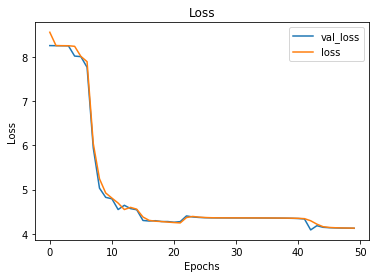

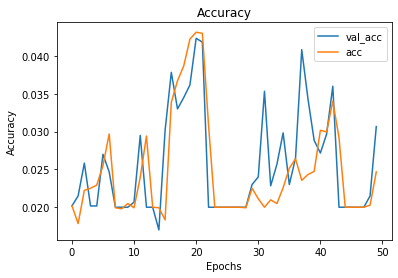

In [17]:
visualize_training_results(histoire)

## Model Notes

In [18]:
#Baseline model is not very good. 
#While loss is low and plateaus around epoch 15, accuracy remains low. 
#accuracy hovers around 3%. 


#Moving on to a CNN model.